In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# negatives

In [2]:
negative_filename = "/Users/quannguyen/computing/research/diverse_as/data/drug/raw/negatives.txt"

with open(negative_filename, "r") as f:
    negatives = f.readlines()
    negatives = [line.strip() for line in negatives]

len(negatives)

100000

In [3]:
df = pd.DataFrame({"smiles": negatives, "label": [0] * len(negatives)})
df

,smiles,label
0,o1c(nnc1NC(=O)CCCC)-c1oc2c(c1)cccc2OC,0
1,s1c(ccc1S(=O)(=O)N1c2c(cc(S(=O)(=O)N)cc2)C[C@@...,0
2,s1c2N=C(S[C@H](C(=O)NC3CCCCC3)C)N(C[C@H]3OCCC3...,0
3,o1nc(nc1CCC(=O)Nc1cc(ccc1)CC)-c1cc(OC)c(OC)cc1,0
4,BrC=1C(OC(=NC=1OC)c1ccccc1)=O,0
...,...,...
99995,Clc1cc(-n2ncc3c2N=C2SC[C@@H](N2C3=O)CC(=O)Nc2c...,0
99996,O(CC(=O)N)c1ccc(cc1OC)CNC(=O)N[C@@H](C(=O)N[C@...,0
99997,Clc1cc(ccc1S(=O)(=O)N(CC(=O)N)C)C(OC)=O,0
99998,S(=O)(=O)(NCCC#N)c1ccc(cc1)C(=O)Nc1ccccc1OC(F)F,0


# positives

In [4]:
keep = None

In [4]:
keep = [
 5,
 17,
 84,
 18,
 112,
 44,
 51,
 105,
 67,
 57,
 61,
 52,
 30,
 9,
 20,
 64,
 89,
 25,
 14,
 118,
 24,
 60,
 75,
 93,
 113,
 95,
 97,
 74,
 3,
 15,
 7,
 58,
 88,
 45,
 2,
 109,
 63,
 59,
 36,
 32,
 40,
 91,
 13,
 22,
 62,
 90,
 94,
 43,
 1,
 4,
 29,
 82,
 56,
 103,
 71,
 92,
 120,
 65,
 106,
 108,
 55,
 34,
 48,
 37,
 0
]

In [5]:
basepath = "/Users/quannguyen/Downloads/ACs"
num_classes = 120

for i in range(1, num_classes + 1):
    if keep is None or i in keep:
        with open(os.path.join(basepath, f"Target_{i}.smi"), "r") as f:
            positives = f.readlines()
            # positives = [line.strip() for line in positives]
            for j, line in enumerate(positives):
                if "\t" in line:
                    positives[j] = line[:line.index("\t")]

            intersection_with_negatives = set(positives).intersection(set(negatives))
            if len(intersection_with_negatives) > 0:
                print(i, intersection_with_negatives)

        df = pd.concat(
            [
                df, 
                pd.DataFrame({"smiles": positives, "label": [i] * len(positives)})
            ]
        )

In [6]:
df

,smiles,label
0,o1c(nnc1NC(=O)CCCC)-c1oc2c(c1)cccc2OC,0
1,s1c(ccc1S(=O)(=O)N1c2c(cc(S(=O)(=O)N)cc2)C[C@@...,0
2,s1c2N=C(S[C@H](C(=O)NC3CCCCC3)C)N(C[C@H]3OCCC3...,0
3,o1nc(nc1CCC(=O)Nc1cc(ccc1)CC)-c1cc(OC)c(OC)cc1,0
4,BrC=1C(OC(=NC=1OC)c1ccccc1)=O,0
...,...,...
1230,Clc1ccc(Nc2ncc3CC(=O)Nc4ccccc4c3n2)cc1,120
1231,[O-][N+](=O)c1ccc(Nc2ncc3CC(=O)Nc4ccccc4c3n2)cc1,120
1232,Cc1ccc(Nc2ncc3CC(=O)Nc4ccccc4c3n2)cc1,120
1233,Oc1ccc(Nc2ncc3CC(=O)Nc4ccccc4c3n2)cc1,120


In [7]:
pruned_df = df.drop_duplicates(subset="smiles", keep=False)
pruned_df

,smiles,label
0,o1c(nnc1NC(=O)CCCC)-c1oc2c(c1)cccc2OC,0
1,s1c(ccc1S(=O)(=O)N1c2c(cc(S(=O)(=O)N)cc2)C[C@@...,0
2,s1c2N=C(S[C@H](C(=O)NC3CCCCC3)C)N(C[C@H]3OCCC3...,0
3,o1nc(nc1CCC(=O)Nc1cc(ccc1)CC)-c1cc(OC)c(OC)cc1,0
4,BrC=1C(OC(=NC=1OC)c1ccccc1)=O,0
...,...,...
1229,COc1ccc(Nc2ncc3CC(=O)Nc4ccccc4c3n2)cc1,120
1230,Clc1ccc(Nc2ncc3CC(=O)Nc4ccccc4c3n2)cc1,120
1231,[O-][N+](=O)c1ccc(Nc2ncc3CC(=O)Nc4ccccc4c3n2)cc1,120
1232,Cc1ccc(Nc2ncc3CC(=O)Nc4ccccc4c3n2)cc1,120


In [8]:
len(set(list(pruned_df.smiles)))

131809

In [9]:
before_label_counts = df.label.value_counts()
after_label_counts = pruned_df.label.value_counts()

cutoff = 0
keep = []

for i in reversed(list(after_label_counts.index)):
    print(f"label {i}: {before_label_counts.loc[i]} --> {after_label_counts.loc[i]} points")
    
    if after_label_counts.loc[i] >= cutoff:
        keep.append(i)

label 72: 298 --> 7 points
label 23: 360 --> 8 points
label 21: 697 --> 10 points
label 119: 276 --> 14 points
label 49: 206 --> 21 points
label 69: 459 --> 24 points
label 98: 457 --> 25 points
label 111: 345 --> 29 points
label 53: 248 --> 35 points
label 79: 300 --> 36 points
label 70: 886 --> 37 points
label 101: 228 --> 44 points
label 73: 336 --> 44 points
label 46: 395 --> 56 points
label 78: 318 --> 58 points
label 80: 332 --> 62 points
label 115: 232 --> 63 points
label 10: 222 --> 66 points
label 42: 545 --> 74 points
label 26: 289 --> 77 points
label 99: 524 --> 80 points
label 11: 261 --> 84 points
label 39: 812 --> 84 points
label 16: 233 --> 90 points
label 19: 241 --> 95 points
label 12: 206 --> 95 points
label 8: 432 --> 98 points
label 38: 242 --> 101 points
label 54: 275 --> 105 points
label 41: 1366 --> 111 points
label 87: 229 --> 112 points
label 77: 1084 --> 114 points
label 102: 604 --> 116 points
label 86: 925 --> 122 points
label 27: 343 --> 124 points
label 11

In [15]:
after_label_counts.values[1:].mean()

265.075

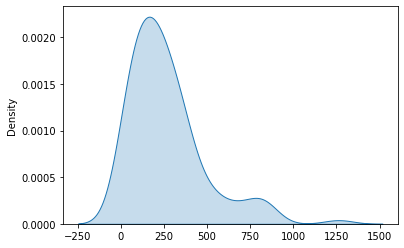

In [13]:
sns.kdeplot(after_label_counts.values[1:], shade=True);

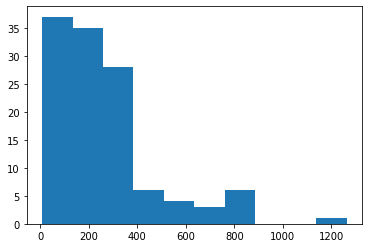

In [14]:
plt.hist(after_label_counts.values[1:]);

In [10]:
pruned_df.to_csv(
    f"/Users/quannguyen/computing/research/diverse_as/data/drug/raw/pruned_{cutoff}.txt", 
    index=False, 
    header=False
)

In [11]:
pruned_df.smiles.to_csv(
    f"/Users/quannguyen/computing/research/diverse_as/data/drug/raw/pruned_smiles_{cutoff}.txt", 
    index=False, 
    header=False
)

In [12]:
pruned_df.label.to_csv(
    f"/Users/quannguyen/computing/research/diverse_as/data/drug/raw/pruned_labels_{cutoff}.txt", 
    index=False, 
    header=False
)